Questions

1.Average spend by age group

2.marital status vs spending pattern

3.High-value customer traits

Deliverable

1.Customer segments table

2.Insights for marketing campaigns

In [1]:
import numpy as np
import pandas as pd

loading the dataset

In [2]:
ecom_df = pd.read_csv(r'data_ecommerce_customer_churn.csv')

checking the first 5 rows of the data

In [3]:
ecom_df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


checking the basic info about the datset

In [4]:
ecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


In [6]:
ecom_df.dtypes

Tenure                      float64
WarehouseToHome             float64
NumberOfDeviceRegistered      int64
PreferedOrderCat             object
SatisfactionScore             int64
MaritalStatus                object
NumberOfAddress               int64
Complain                      int64
DaySinceLastOrder           float64
CashbackAmount              float64
Churn                         int64
dtype: object

checking for the null values

In [7]:
ecom_df.isnull().sum().sort_values(ascending=False)

DaySinceLastOrder           213
Tenure                      194
WarehouseToHome             169
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
CashbackAmount                0
Churn                         0
dtype: int64

there are couple of missing values. lets fix them first

<AxesSubplot:ylabel='Frequency'>

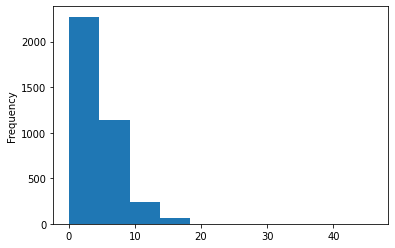

In [8]:
ecom_df['DaySinceLastOrder'].plot.hist()

since the data is right skewed lets impute the missing values with mean

In [9]:
mean_days_last_order = ecom_df['DaySinceLastOrder'].mean()
mean_days_last_order

4.531652360515022

In [10]:
ecom_df['DaySinceLastOrder'].fillna(mean_days_last_order,inplace=True)

<AxesSubplot:ylabel='Frequency'>

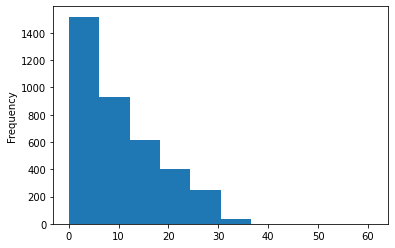

In [11]:
ecom_df['Tenure'].plot.hist()

since the data is right skewed lets impute the missing values with mean

In [12]:
mean_tenure = ecom_df['Tenure'].mean()
mean_tenure

10.081398452095009

In [13]:
ecom_df['Tenure'].fillna(mean_tenure,inplace=True)

<AxesSubplot:ylabel='Frequency'>

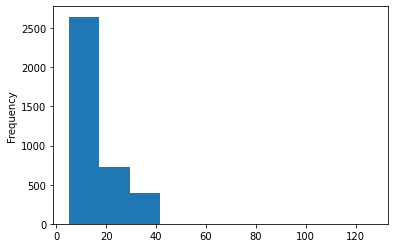

In [14]:
ecom_df['WarehouseToHome'].plot.hist()

since the data is right skewed lets impute the missing values with mean

In [15]:
mean_wh_dist = ecom_df['WarehouseToHome'].mean()
mean_wh_dist

15.650583244962885

In [16]:
ecom_df['WarehouseToHome'].fillna(mean_wh_dist,inplace=True)

In [17]:
ecom_df.isnull().sum()

Tenure                      0
WarehouseToHome             0
NumberOfDeviceRegistered    0
PreferedOrderCat            0
SatisfactionScore           0
MaritalStatus               0
NumberOfAddress             0
Complain                    0
DaySinceLastOrder           0
CashbackAmount              0
Churn                       0
dtype: int64

checking for the basic statistics

In [18]:
ecom_df.describe()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000
mean,10.081398,15.650583,3.679269,3.088302,4.237757,0.282416,4.531652,176.707419,0.171023
std,8.286987,8.269040,1.013938,1.381832,2.626699,0.450232,3.567132,48.791784,0.376576
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.700000,0.000000
50%,9.000000,14.000000,4.000000,3.000000,3.000000,0.000000,4.000000,163.340000,0.000000
75%,15.000000,20.000000,4.000000,4.000000,6.000000,1.000000,7.000000,195.250000,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


lets assume the cashback amount col as the amount spent for this project as it is spend behaviour.

lets rename the cashback amount col to amount spent

In [19]:
ecom_df.rename(columns={'CashbackAmount':'Amt Spent'},inplace=True)

1. Avg spend by age group

for this lets add a new col called age bucket that buckets the tenurity of the customer

In [37]:
ecom_df['Age Bucket'] = pd.cut(ecom_df['Tenure'],bins=[0,10,20,30,40,50,60,90],include_lowest=True)
ecom_df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,Amt Spent,Churn,Age Bucket
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.000000,143.32,0,"(10.0, 20.0]"
1,7.0,25.0,4,Mobile,1,Married,2,0,7.000000,129.29,0,"(-0.001, 10.0]"
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.000000,168.54,0,"(20.0, 30.0]"
3,20.0,25.0,4,Fashion,3,Divorced,7,0,4.531652,230.27,0,"(10.0, 20.0]"
4,30.0,15.0,4,Others,4,Single,8,0,8.000000,322.17,0,"(20.0, 30.0]"


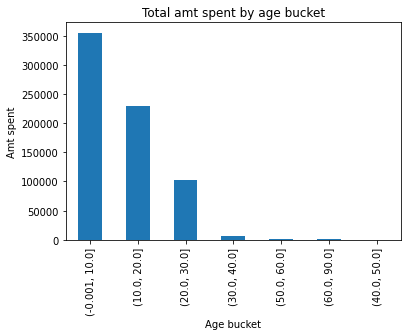

In [38]:
(ecom_df.groupby('Age Bucket')['Amt Spent'].sum()
    .sort_values(ascending=False)
    .plot.bar(title='Total amt spent by age bucket',
              xlabel='Age bucket',
              ylabel='Amt spent')
);

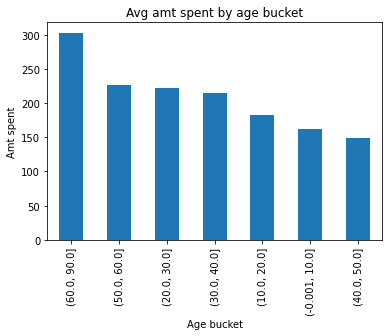

In [39]:
(ecom_df.groupby('Age Bucket')['Amt Spent'].mean()
    .sort_values(ascending=False)
    .plot.bar(title='Avg amt spent by age bucket',
              xlabel='Age bucket',
              ylabel='Amt spent')
);

In [40]:
ecom_df.groupby('Age Bucket')['Amt Spent'].mean()

Age Bucket
(-0.001, 10.0]    163.045969
(10.0, 20.0]      182.683767
(20.0, 30.0]      221.910217
(30.0, 40.0]      215.757813
(40.0, 50.0]      149.000000
(50.0, 60.0]      226.375000
(60.0, 90.0]      303.750000
Name: Amt Spent, dtype: float64

In [41]:
ecom_df['Age Bucket'].value_counts()

(-0.001, 10.0]    2183
(10.0, 20.0]      1261
(20.0, 30.0]       461
(30.0, 40.0]        32
(50.0, 60.0]         2
(40.0, 50.0]         1
(60.0, 90.0]         1
Name: Age Bucket, dtype: int64

1.the total amount spent by customers in the age bucket 0-10 is more as these are the new customers.
as the aging of the customers increase the spend amt decreases. 

2.the avg amount spent by customers in 60-90 bucket is highest and 0-10 is 2nd lowest.

3.this indicates the 0-10 customers are more and are purchasing more of low value items and 60-90 customers is only 1 purchased one item of high value.

In [42]:
ecom_df['Tenure'].sort_values(ascending=False)

51      61.0
1209    60.0
449     51.0
3778    50.0
691     31.0
        ... 
3615     0.0
1855     0.0
135      0.0
138      0.0
2093     0.0
Name: Tenure, Length: 3941, dtype: float64

the maximum tenure customer is of 61 days at index 51. lets check what product he bought

In [46]:
ecom_df.iloc[51,:]

Tenure                              61.0
WarehouseToHome                     28.0
NumberOfDeviceRegistered               4
PreferedOrderCat                 Grocery
SatisfactionScore                      1
MaritalStatus                    Married
NumberOfAddress                        6
Complain                               1
DaySinceLastOrder                    1.0
Amt Spent                         303.75
Churn                                  0
Age Bucket                  (60.0, 90.0]
Name: 51, dtype: object

the customer bought groceries worth 303 which is the highest

2. Marital status vs spending pattern   

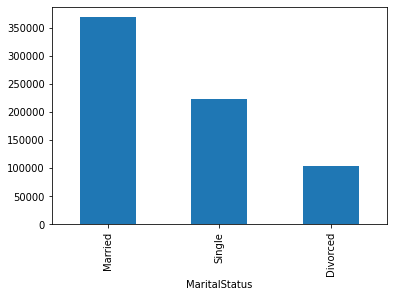

In [51]:
(ecom_df.groupby('MaritalStatus')['Amt Spent'].sum()
    .sort_values(ascending=False)
     .plot.bar()
);

married customers are spending more. they need to buy for the family.

In [54]:
ecom_df['PreferedOrderCat'].value_counts()

Laptop & Accessory    1458
Mobile Phone           887
Fashion                585
Mobile                 559
Grocery                273
Others                 179
Name: PreferedOrderCat, dtype: int64

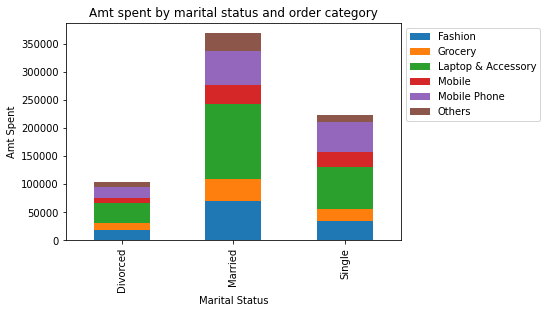

In [66]:
(ecom_df.pivot_table(index='MaritalStatus',columns='PreferedOrderCat',values='Amt Spent',aggfunc='sum')
    
     .plot.bar(stacked = True,
              title = 'Amt spent by marital status and order category',
              xlabel = 'Marital Status',
              ylabel = 'Amt Spent').legend(bbox_to_anchor=(1,1))
);

Laptop & accessory are most bought by all types of marital status

checking for highly bought order category

In [68]:
ecom_df.groupby('PreferedOrderCat')['Amt Spent'].sum().sort_values(ascending=False)

PreferedOrderCat
Laptop & Accessory    243734.25
Mobile Phone          131687.96
Fashion               122907.08
Grocery                73170.43
Mobile                 70561.06
Others                 54343.16
Name: Amt Spent, dtype: float64

Laptop & accessory is where most people spending their money

3. High-value customers traits

In [69]:
ecom_df['NumberOfDeviceRegistered'].value_counts()

4    1694
3    1193
5     591
2     192
1     164
6     107
Name: NumberOfDeviceRegistered, dtype: int64

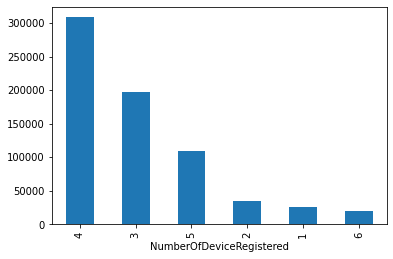

In [72]:
(ecom_df.groupby('NumberOfDeviceRegistered')['Amt Spent'].sum()
        .sort_values(ascending=False)
     .plot.bar()
);

customers who logged into multiple devices here 4 devices are buying more. this might be due to discounts on first order offers

In [75]:
ecom_df['WarehouseToHome'].nunique()

34

lets create a new col to bucketize warehousetohome distance

In [76]:
ecom_df['Wh_to_hm bucket']=pd.cut(ecom_df['WarehouseToHome'],bins=[0,5,10,15,20,25,30,35,40,45,50,55,60])

In [78]:
ecom_df['Wh_to_hm bucket'].value_counts()

(5, 10]     1362
(10, 15]     924
(15, 20]     697
(20, 25]     336
(30, 35]     297
(25, 30]     282
(35, 40]      36
(0, 5]         6
(40, 45]       0
(45, 50]       0
(50, 55]       0
(55, 60]       0
Name: Wh_to_hm bucket, dtype: int64

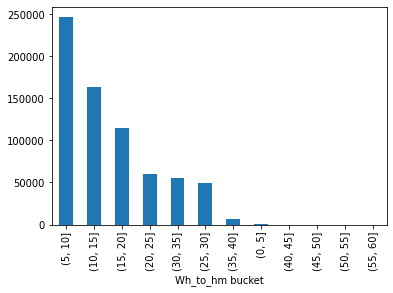

In [82]:
(ecom_df.groupby('Wh_to_hm bucket')['Amt Spent'].sum()
    .sort_values(ascending=False)
     .plot.bar()

);

1.the customers who are in range of 5-10 kms range from the store are spending more money follwed by 10-15 km range.

2.the customers who are near by the store 0-5 km range are nor ordering via platform but might be going to the store

In [85]:
ecom_df['DaySinceLastOrder'].unique()

array([ 7.        ,  4.53165236,  8.        , 11.        ,  2.        ,
        1.        ,  4.        ,  3.        ,  6.        ,  0.        ,
       14.        ,  9.        , 10.        , 12.        ,  5.        ,
       17.        , 30.        , 18.        , 16.        , 13.        ,
       15.        , 46.        , 31.        ])

creating a new col to bucketize days since last order

In [87]:
ecom_df['days_last_order_bucket'] = pd.cut(ecom_df['DaySinceLastOrder'],bins=[0,2,4,6,8,10,12,14,30,45,60])

In [88]:
ecom_df['days_last_order_bucket'].value_counts()

(0, 2]      984
(2, 4]      944
(6, 8]      696
(4, 6]      449
(8, 10]     319
(10, 12]    100
(12, 14]     61
(14, 30]     41
(30, 45]      1
(45, 60]      1
Name: days_last_order_bucket, dtype: int64

In [91]:
ecom_df.groupby('days_last_order_bucket')['Amt Spent'].sum().sort_values(ascending=False)

days_last_order_bucket
(0, 2]      160518.31
(2, 4]      158255.84
(6, 8]      124606.43
(4, 6]       89444.64
(8, 10]      65806.25
(10, 12]     21953.39
(12, 14]     14128.39
(14, 30]      9504.79
(45, 60]       206.09
(30, 45]       157.04
Name: Amt Spent, dtype: float64

In [100]:
(ecom_df.groupby(['days_last_order_bucket','Age Bucket'])[['Amt Spent']].count()
    .sort_values(by='Amt Spent',ascending=False)
)

Amt Spent
days_last_order_bucket Age Bucket               
(0, 2]                 (-0.001, 10.0]        598
(2, 4]                 (-0.001, 10.0]        575
(6, 8]                 (-0.001, 10.0]        380
(0, 2]                 (10.0, 20.0]          281
(2, 4]                 (10.0, 20.0]          258
...                                          ...
                       (60.0, 90.0]            0
(12, 14]               (30.0, 40.0]            0
                       (40.0, 50.0]            0
                       (50.0, 60.0]            0
(45, 60]               (60.0, 90.0]            0

[70 rows x 1 columns]

the newly joined customers 0-10 are ordering mostly

High value customers' characteristics:
1. They are married
2. Purchasing Laptop & accessories
3. Of age bucket 0-10 and 10-20
4. At a distance of 5-10 kms away from the store. As the distance increases the order amt decrease may be buying only items not available in their living radius.
5. The customers of age bucket 0-10 are most frequently spending
6. Customers who are logged in multiple devices are buying more. This might be due to offers or discount on first time buying options.

Deliverables

1. Customer Segments table

Customers by tenurity

In [105]:
customers_tenurity_table = ecom_df.pivot_table(index='Age Bucket',
                                              values='Tenure',
                                              aggfunc='count').sort_values(by='Tenure',ascending=False)
customers_tenurity_table

,Tenure
Age Bucket,
"(-0.001, 10.0]",2183
"(10.0, 20.0]",1261
"(20.0, 30.0]",461
"(30.0, 40.0]",32
"(50.0, 60.0]",2
"(40.0, 50.0]",1
"(60.0, 90.0]",1


In [108]:
customers_device_table = ecom_df.pivot_table(index='NumberOfDeviceRegistered',
                                              values='Amt Spent',
                                              aggfunc='count').sort_values(by='Amt Spent',ascending=False)
customers_device_table

,Amt Spent
NumberOfDeviceRegistered,
4,1694
3,1193
5,591
2,192
1,164
6,107


In [110]:
customers_dist_table = ecom_df.pivot_table(index='Wh_to_hm bucket',
                                              values='Amt Spent',
                                              aggfunc='count').sort_values(by='Amt Spent',ascending=False)

customers_dist_table

,Amt Spent
Wh_to_hm bucket,
"(5, 10]",1362
"(10, 15]",924
"(15, 20]",697
"(20, 25]",336
"(30, 35]",297
"(25, 30]",282
"(35, 40]",36
"(0, 5]",6
"(40, 45]",0


In [111]:
customers_marital_table = ecom_df.pivot_table(index='MaritalStatus',
                                              values='Amt Spent',
                                              aggfunc='count').sort_values(by='Amt Spent',ascending=False)

customers_marital_table

,Amt Spent
MaritalStatus,
Married,2055
Single,1310
Divorced,576


In [113]:
customers_lastordered_table = ecom_df.pivot_table(index='days_last_order_bucket',
                                              values='Amt Spent',
                                              aggfunc='count').sort_values(by='Amt Spent',ascending=False)

customers_lastordered_table

,Amt Spent
days_last_order_bucket,
"(0, 2]",984
"(2, 4]",944
"(6, 8]",696
"(4, 6]",449
"(8, 10]",319
"(10, 12]",100
"(12, 14]",61
"(14, 30]",41
"(30, 45]",1


2. Marketing Insights

1. Focusing more on the customers who stays more than 20 days helps in retaining them. Providing offers and discounts might help
2. Finding out what products the long distance customers are buying from local stores and having them on our ecommerce site